In [95]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import numpy as np

from sklearn import linear_model, metrics

from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('CO2 emission.csv')

In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
MODELYEAR                   1067 non-null int64
MAKE                        1067 non-null object
MODEL                       1067 non-null object
VEHICLECLASS                1067 non-null object
ENGINESIZE                  1067 non-null float64
CYLINDERS                   1067 non-null int64
TRANSMISSION                1067 non-null object
FUELTYPE                    1067 non-null object
FUELCONSUMPTION_CITY        1067 non-null float64
FUELCONSUMPTION_HWY         1067 non-null float64
FUELCONSUMPTION_COMB        1067 non-null float64
FUELCONSUMPTION_COMB_MPG    1067 non-null int64
CO2EMISSIONS                1067 non-null int64
dtypes: float64(4), int64(4), object(5)
memory usage: 108.4+ KB


In [29]:
df1=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [30]:
df1.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [31]:
emission_new=df1

In [32]:
emission_new.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,11.580881,256.228679
std,1.415895,1.797447,3.485595,63.372304
min,1.000000,3.000000,4.700000,108.000000
25%,2.000000,4.000000,9.000000,207.000000
50%,3.400000,6.000000,10.900000,251.000000
75%,4.300000,8.000000,13.350000,294.000000
max,8.400000,12.000000,25.800000,488.000000


In [33]:
emission_new.mode()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4.0,8.5,294.0
1,NaN,NaN,9.1,NaN
2,NaN,NaN,9.8,NaN


In [34]:
emission_new.median()

ENGINESIZE                3.4
CYLINDERS                 6.0
FUELCONSUMPTION_COMB     10.9
CO2EMISSIONS            251.0
dtype: float64

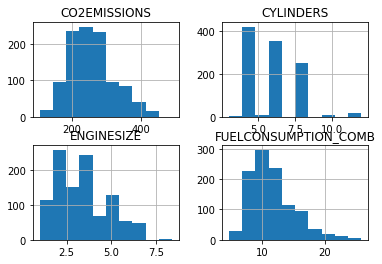

In [35]:
emission_new.hist()
plt.show()

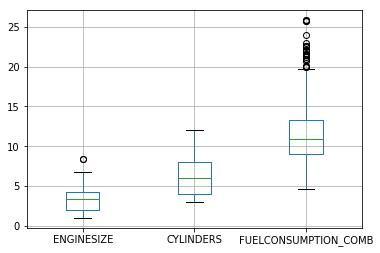

In [88]:
emission_new.boxplot(column=['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB'])

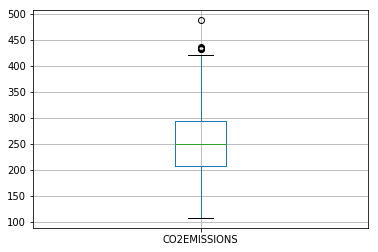

In [38]:
emission_new.boxplot(column=['CO2EMISSIONS'])

In [39]:
emission_new.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.819482,0.874154
CYLINDERS,0.934011,1.000000,0.776788,0.849685
FUELCONSUMPTION_COMB,0.819482,0.776788,1.000000,0.892129
CO2EMISSIONS,0.874154,0.849685,0.892129,1.000000


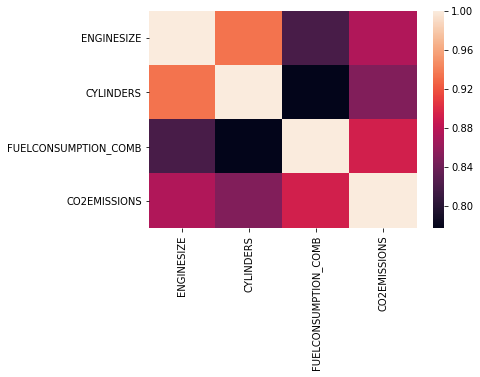

In [40]:
sns.heatmap(emission_new.corr())

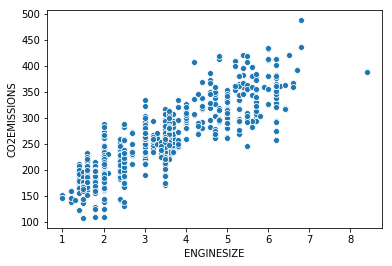

In [41]:
sns.scatterplot(x='ENGINESIZE',y='CO2EMISSIONS',data=emission_new)

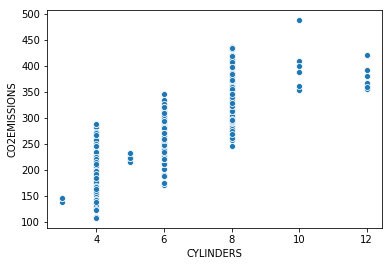

In [42]:
sns.scatterplot(x='CYLINDERS',y='CO2EMISSIONS',data=emission_new)

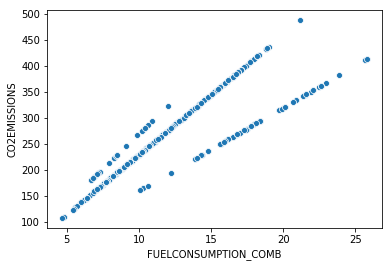

In [44]:
sns.scatterplot(x='FUELCONSUMPTION_COMB',y='CO2EMISSIONS',data=emission_new)

C:\Users\Tarun\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


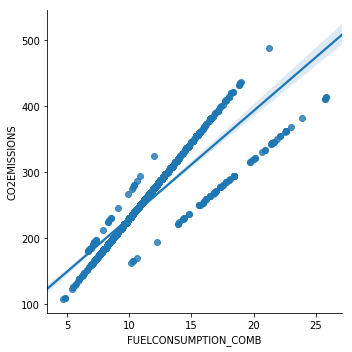

In [45]:
sns.lmplot(x='FUELCONSUMPTION_COMB',y='CO2EMISSIONS',data=emission_new)

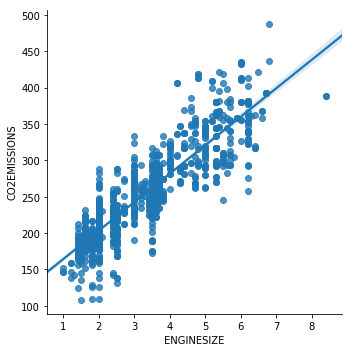

In [46]:
sns.lmplot(x='ENGINESIZE',y='CO2EMISSIONS',data=emission_new)

In [48]:
model=linear_model.LinearRegression()

In [103]:
x_train, x_test, y_train, y_test = train_test_split(emission_new['ENGINESIZE'].values.reshape(-1,1),emission_new['CO2EMISSIONS'].values.reshape(-1,1),test_size=0.2)

In [107]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [108]:
model.score(x_train,y_train)

0.7732477970721964

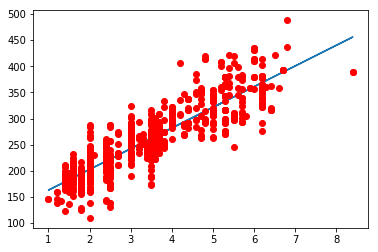

In [109]:
plt.plot(x_train,model.predict(x_train))
plt.plot(x_train,y_train,'ro')
plt.show()

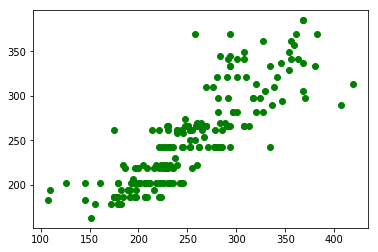

In [111]:
plt.plot(y_test,model.predict(x_test),'go')

In [112]:
metrics.mean_squared_error(y_train,model.predict(x_train))

947.5796031040477

In [116]:
x_train, x_test, y_train, y_test = train_test_split(emission_new[['ENGINESIZE','FUELCONSUMPTION_COMB']].values,emission_new['CO2EMISSIONS'].values.reshape(-1,1),test_size=0.2)

In [118]:
multi_model=linear_model.LinearRegression()

In [119]:
multi_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [122]:
multi_model.score(x_train,y_train)

0.8563756589850893

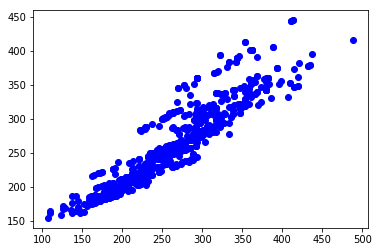

In [120]:
plt.plot(y_train,multi_model.predict(x_train),'bo')

In [121]:
metrics.mean_squared_error(y_train,multi_model.predict(x_train))

585.14987177543

# error decreased by using two independant variable instead of one and score also increased